In this notebook we are going to remove outilers using Boxplot 




# Outline 

- [Vocabulary](#1) 
- [What is Box Plot](#2)
- [Detecting Outliers of the dataset using Boxplot](#3)

## About the dataset 

* The dataset is about server computers and it contains unexpected behavior in server computers  
* As a result of that,  we will implement an anomaly detection algorithm to detect the anomalous behavior in server computers 

## Attribute details of the dataset 
<table style = "width:100%">
    <tr>
      <th style="text-align:center" >Name</th>
      <th style="text-align:center">Type</th> 
      <th style="text-align:center">Description</th>
      <th style="text-align:center">Units</th>
    </tr>
    <tr>
        <td style="text-align:center">Latency(ms)</td>
        <td style="text-align:center">Float</td>
        <td style="text-align:center">Latency is the delay between a user's action and a web application's response to that action</td>
        <td style="text-align:center">Latency is usually measured in milliseconds or ms.</td>
    </tr>
    <tr>
        <td style="text-align:center">Throughput(mb/s)</td>
        <td style="text-align:center">Float</td>
        <td style="text-align:center">Throughput is the amount of data can be sent and recieved within a unit of time</td>
        <td style="text-align:center">Throughput is usually measured in megabit per second or mb/s and it is equivalent to 1,000,000 bits per second.</td>
    </tr>
</table>

<br>

In [13]:
import pandas as pd

import matplotlib.pyplot as plt 

import numpy as np 

import seaborn as sns

In [7]:
#label every column
names = ["Latency(ms)","Throughput(mb/s)"]


#import the training datset
data = pd.read_csv("tr_server_data.csv",header = None , names = names)
 

In [8]:
data

,Latency(ms),Throughput(mb/s)
0,13.0470,14.741
1,13.4090,13.763
2,14.1960,15.853
3,14.9150,16.174
4,13.5770,14.043
...,...,...
302,12.4770,14.459
303,19.5830,10.412
304,23.3400,16.299
305,18.2610,17.978


Text(0.5, 1.0, 'The Relationship between Latency and Throughput')

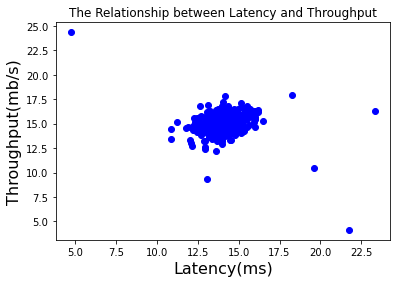

In [12]:
#Throughput and latency have a direct relationship, so lets plot the relationship between them
plt.scatter(data["Latency(ms)"].values,data["Throughput(mb/s)"].values, color = "b" )
plt.xlabel("Latency(ms)" , fontsize = 16)
plt.ylabel("Throughput(mb/s)", fontsize = 16)
plt.title("The Relationship between Latency and Throughput")

 > - We can see that there are some value that are away from the normal values 
 > - Our job to remove those examples 



## Vocabulary <a anchor = "anchor" id = "1" />


before explaining what is box plot we should know some vocabulary helps us to understand it

- __Mode:__ The value that appear most frequently in the dataset
- __Median:__ The middle value for the ordered set arranged in asending order 
- __Range__: The difference between the highest and the lowest number 
- __Mean__: The average of values in the dataset 

- __Quartiles__: 

 - The median divides a set of data into two parts with an equal number of scores 
 - Similarly, a set of data can be divided into four equal parts with an equal number of scores 
 - The values that divides the dataset into four equal parts called `Quartiles`
 - Each set of data has three quartiles: 
   * The lower denotes as $Q_1$ 
   * The middle(called the median) denoted as $Q_2$
   * The upper denoted as $Q_3$
 
 - An image the decribes the quartiles 
 
<img  src = "https://i.imgur.com/vlwuaIS.jpg" />


  - We can see that: 
    - $25\%$ of the scores $< Q_1$ and $75\%$ of the scores$ > Q_1$
    - $50\%$ of the scores $< Q_2$ and $50\%$ of the scorse $> Q_2$
    - $75\%$ of the scores $< Q_3$ and $25\%$ of the socres $>Q_3$



- __Interquartile Range(IQR):__ The IQR describes the middle 50% of values when ordered from lowest to highest
 - Both IQR and Range gives us a measure of how data varies 
 - IQR is a better measure of spread than the range as it is not affected by outliers

## What is Box Plot ? <a anchor = "anchor" id = "2"  width="50" height="60">

- A pictorial way for representing five statistical terms:
    - Minmum  
    - Maximum
    - Quartiles 
  
- An image describes the boxplot
   

 <img src ="https://i.imgur.com/j6lz6rn.png"  />
    


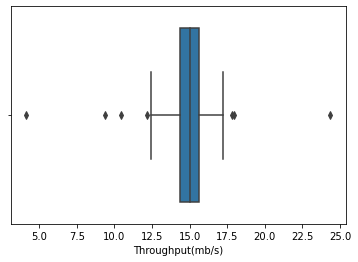

In [26]:
#plot 1D boxplot 

sns.boxplot(data["Throughput(mb/s)"])

## Detecting Outliers of the dataset using Boxplot <a anchor = "anchor"  id = "3" />

In [37]:
#compute the interquartile range 

q1, q2,q3 = np.percentile(data["Throughput(mb/s)"].values,[25,50,75])

In [55]:
q1, q2, q3

(14.362000000000002, 15.023, 15.654499999999999)

In [52]:
#compute IQR 

iqr = q3 - q1
dsf
iqr

1.2924999999999969

In [53]:
#calculate the min and max limits to be considered outliers 

min_limit = q1 - 1.5 * (iqr)

max_limit = q3 + 1.5*(iqr)

In [54]:
min_limit,  max_limit

(12.423250000000007, 17.593249999999994)

In [63]:
#identifying the points

np.sort([x for x in data["Throughput(mb/s)"] if(x > max_limit or  x < min_limit)])

array([ 4.1262,  9.3479, 10.412 , 12.203 , 17.834 , 17.978 , 24.35  ])

## Congratulations 